In [1]:
#common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#imports for ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#import for model split and parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#import for model accuracy
from sklearn.metrics import roc_auc_score

In [2]:
#loading train dataset. Ensure file is in same directory or disclose path in code below
df_40 = pd.read_csv ('exercise_40_train.csv')

In [3]:
df_40.head(50)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935
5,0,1.926053,19.524376,Saturday,3.702574,2.300792,-0.331106,0.0079%,3.085443,0.472701,...,-0.689223,5.253010,no,NaN,NaN,9.882197,5.632881,0,NaN,97.129172
6,0,0.094162,18.894755,Thursday,2.027918,1.580408,1.190932,0.0174%,-0.331730,2.178622,...,1.095847,NaN,no,5.132039,0.973211,9.076239,9.197448,0,yes,89.613323
7,0,0.921300,19.160713,Sat,-1.274067,-0.867023,-2.036134,-0.0106%,2.830838,1.206701,...,-0.512785,1.986687,no,3.625493,-0.113036,12.495594,6.927711,0,yes,102.151914
8,0,0.589354,21.627989,Wednesday,1.672593,0.158446,2.073026,0.0032%,-0.908026,-0.064304,...,NaN,5.221553,no,4.270353,1.072603,9.789410,7.349307,0,yes,96.251348
9,0,1.016857,21.440000,Tuesday,-2.619848,0.637245,1.357868,0.0091%,1.471836,0.811922,...,NaN,7.427018,no,2.794465,0.219889,10.211048,10.970247,0,NaN,97.814997


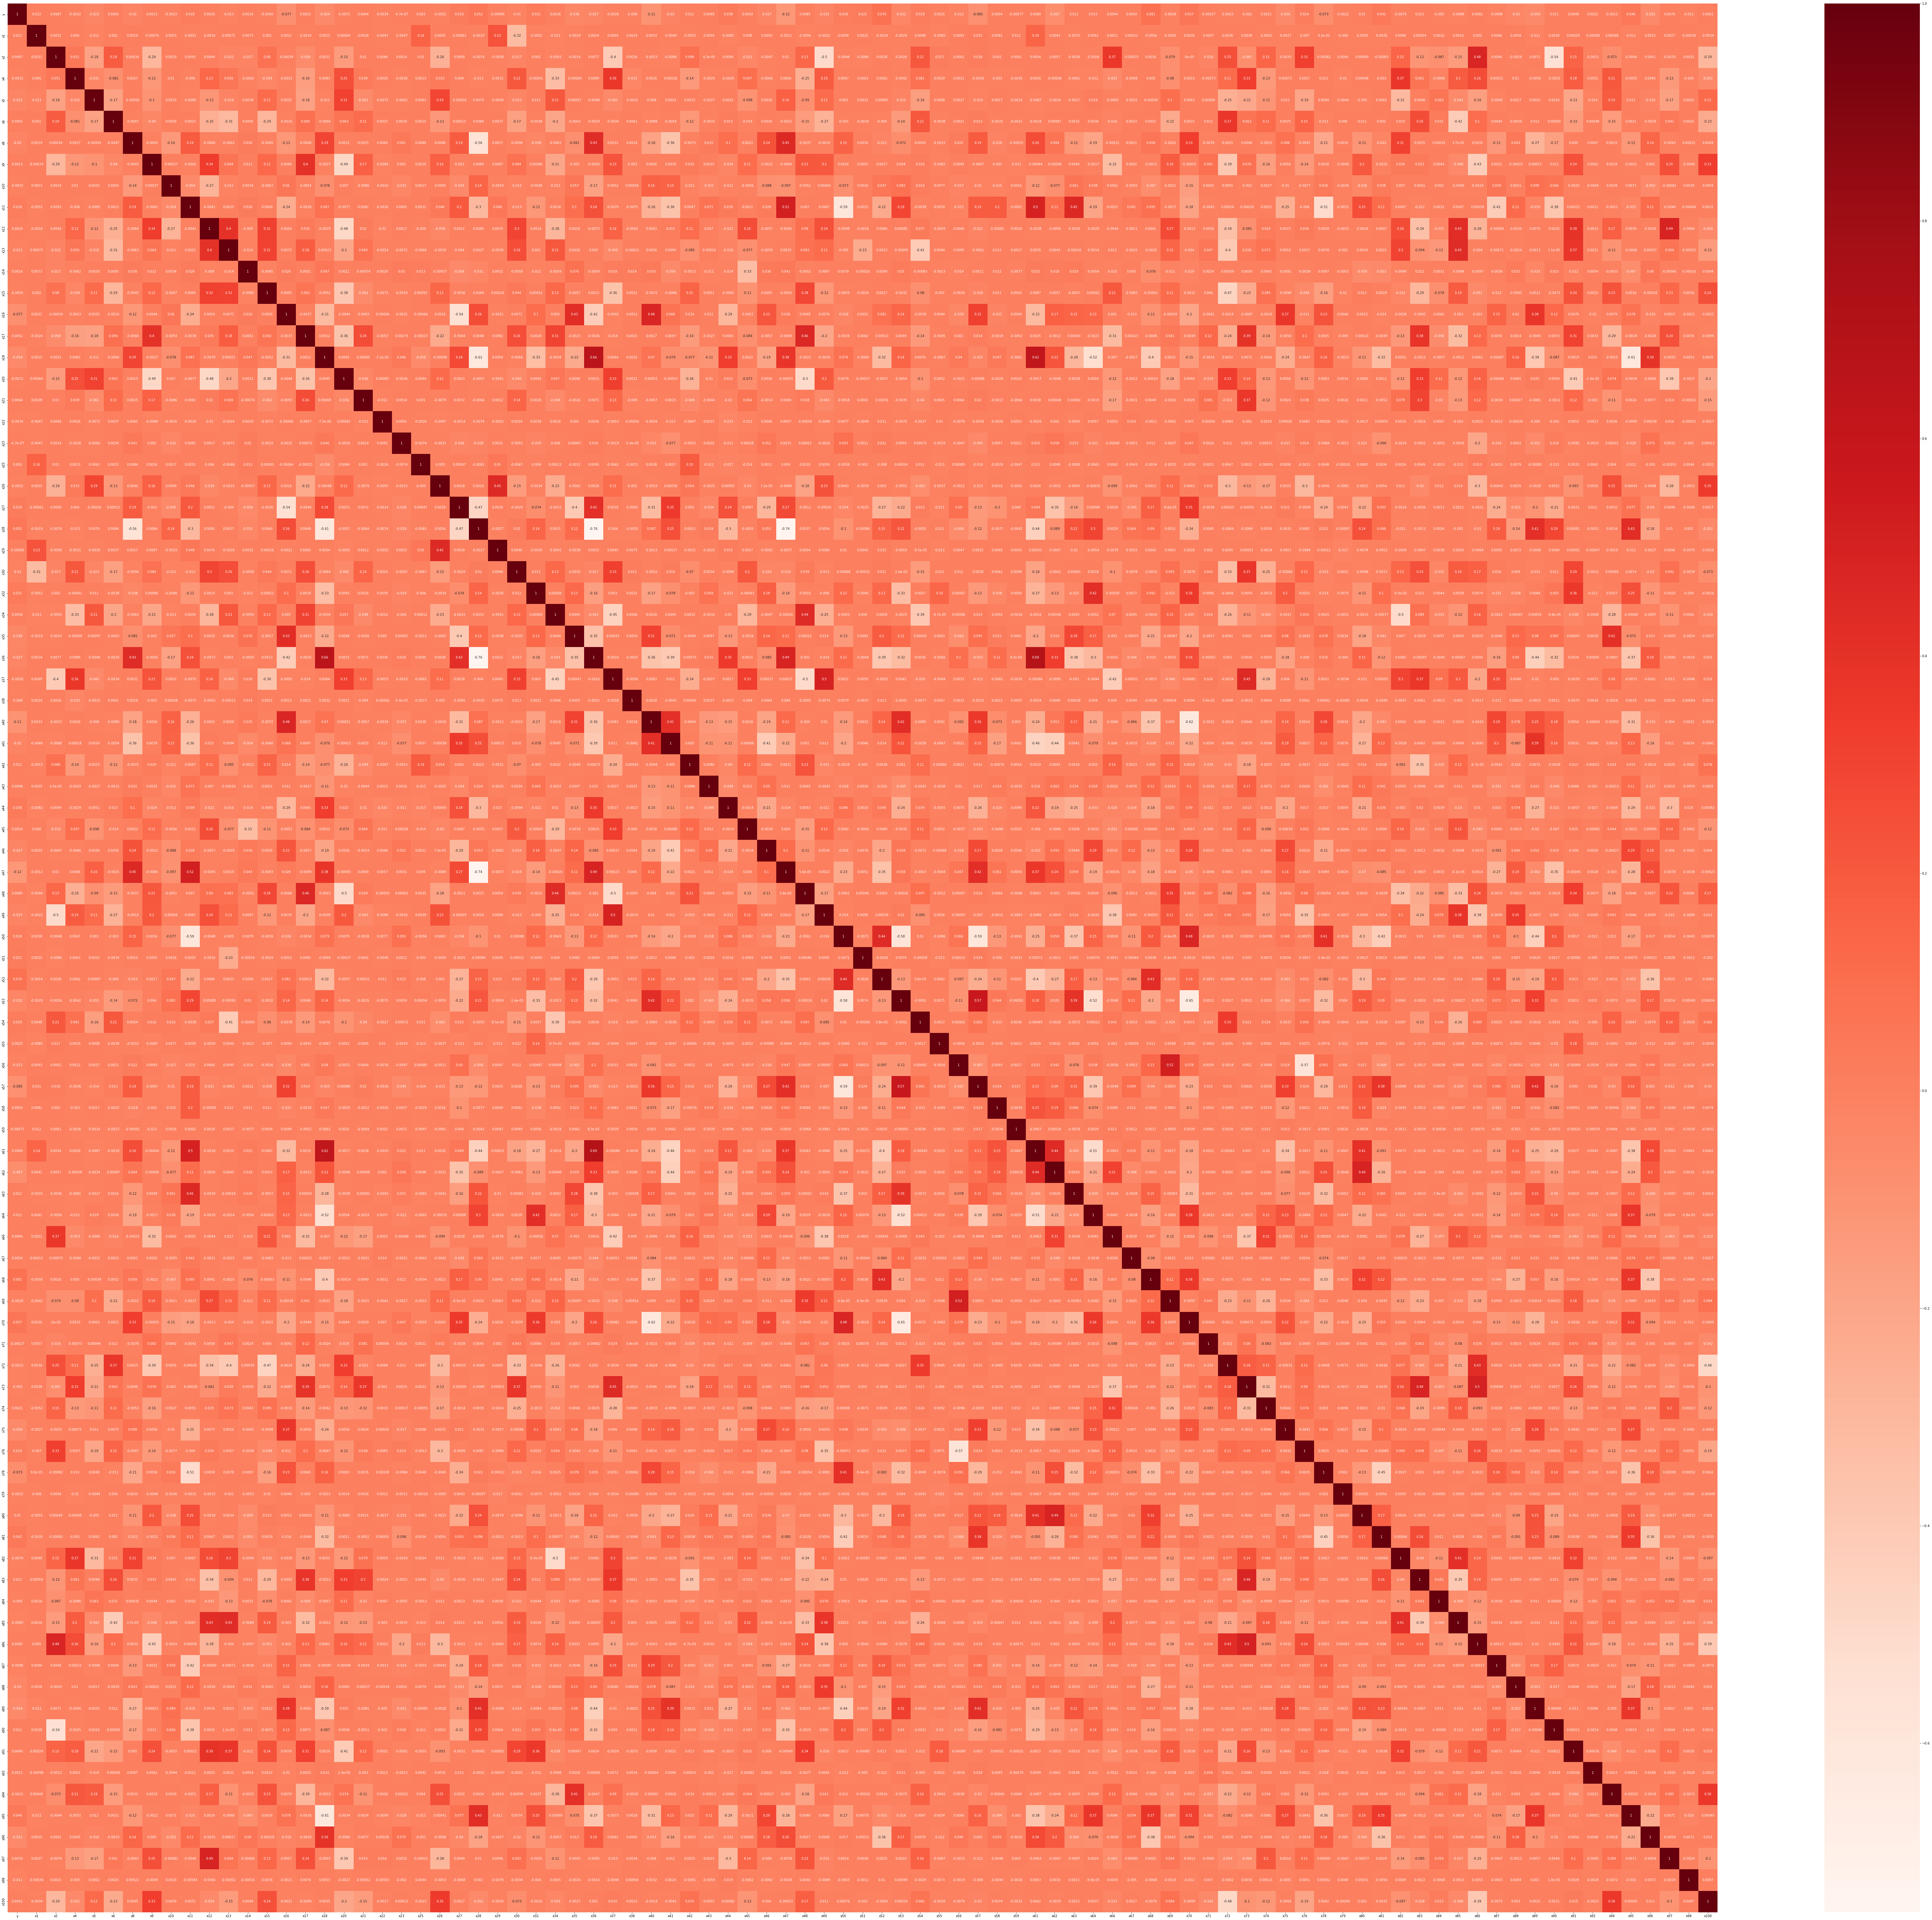

In [4]:
#to save time cleaning data. I will perform a correlation matrix to see which columns(features) 
#are most relevant. Graph is just for quick visual, will subset using a limit of 7.5%
plt.figure(figsize=(120,110))
cor = df_40.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [5]:
#Correlation with output variable
cor_target = abs(cor["y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.075]
relevant_features

y      1.000000
x16    0.076702
x40    0.109574
x47    0.123445
x52    0.075891
x57    0.084861
x68    0.080861
Name: y, dtype: float64

In [6]:
df_40_relevant = df_40[["y", "x16", "x40", "x47", "x52", "x57", "x68"]]
df_40_relevant

,y,x16,x40,x47,x52,x57,x68
0,0,101.906052,18.129499,53.359113,7.617666,NaN,15.263491
1,1,100.112121,11.389081,37.728834,NaN,NaN,33.940951
2,1,99.215210,14.372443,50.236892,15.057485,NaN,18.211817
3,0,NaN,13.191173,41.857197,NaN,NaN,14.629914
4,0,100.626558,17.210430,47.844153,14.193721,NaN,12.227512
...,...,...,...,...,...,...,...
39995,0,NaN,10.179765,46.141238,NaN,NaN,NaN
39996,0,100.310553,15.199744,51.108985,3.505938,NaN,11.506345
39997,0,100.859798,13.760100,58.107523,-1.126181,NaN,15.579129
39998,0,100.481909,10.772991,41.613442,20.449765,NaN,21.402776


In [7]:
df_40_relevant.describe()
#X57 and X52 have very low counts. Will not be accurate to impute in that many NaN's
df_40_relevant = df_40_relevant.drop(columns = ["x57", "x52"])

In [8]:
#Filling NaN's. Using Mean as the numbers do not carry any categorical importance
df_40_relevant = df_40_relevant.fillna(df_40_relevant.mean())
df_40_relevant

,y,x16,x40,x47,x68
0,0,101.906052,18.129499,53.359113,15.263491
1,1,100.112121,11.389081,37.728834,33.940951
2,1,99.215210,14.372443,50.236892,18.211817
3,0,100.702408,13.191173,41.857197,14.629914
4,0,100.626558,17.210430,47.844153,12.227512
...,...,...,...,...,...
39995,0,100.702408,10.179765,46.141238,14.934315
39996,0,100.310553,15.199744,51.108985,11.506345
39997,0,100.859798,13.760100,58.107523,15.579129
39998,0,100.481909,10.772991,41.613442,21.402776


In [9]:
#train_test_split data
X = df_40_relevant.drop(columns = "y")
y = df_40_relevant["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=24)

In [17]:
#This value count confirms the dataset is heavily weighted towards being a 0.
df_40_relevant["y"].value_counts()

0    34197
1     5803
Name: y, dtype: int64

In [20]:
#parameter grid search for decision tree classifier
param_grid = {'max_depth': [1,2,3,4,5,8], 'max_leaf_nodes': list(range(2, 20, 1)), 'min_samples_split': [2,3,4,5,8]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=24), param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)
print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
The best parameters are:  {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2}


In [21]:
#fitting model with above parameters 
decision_tree = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2, min_samples_split=2) 
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)

In [22]:
decision_tree_predictions = decision_tree.predict(X_test)

In [23]:
decision_tree.score(X_test, y_test)

0.8511666666666666

In [26]:
#time to predict and output to csv
#loading in new data
data_test_preds = pd.read_csv ('exercise_40_test.csv')

In [27]:
#preparing new data
data_test_preds = data_test_preds[["x16","x40","x47","x68"]]
data_test_preds = data_test_preds.fillna(data_test_preds.mean())

In [28]:
#predicting probabilities 
decision_tree_predictions_test = decision_tree.predict_proba(data_test_preds)

In [41]:
#Taking only probabilties of correct label, coverting to series for export
decision_data = decision_tree_predictions_test[:,0]
decision_data = pd.Series(decision_data)

In [32]:
#logistic probabilities
logistic_predictions_test = logisticRegr.predict_proba(data_test_preds)

In [44]:
#Taking only probabilties of correct label, converting to series for export
log_data = logistic_predictions_test[:,0]
log_data = pd.Series(log_data)
log_data

0       0.907695
1       0.842415
2       0.853431
3       0.845453
4       0.766561
          ...   
9995    0.879878
9996    0.735076
9997    0.864730
9998    0.795458
9999    0.904957
Length: 10000, dtype: float64